# 1. Introduction

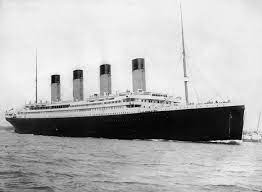

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### 1.2 Data Dictionary

Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
* Variable Notes
* pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.

# 2. Getting Started

### 2.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2 Data Loading and Summary Getting


In [2]:
# load datasets
df_train_data = pd.read_csv("train.csv")
df_test_data = pd.read_csv("test.csv")
df_gender_submission_data = pd.read_csv("gender_submission.csv")
df_concat_data = pd.concat([df_train_data, df_test_data], sort=True).reset_index(drop=True)

In [3]:
df_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train_data.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# define a method to count the number of null values and calculate the percentage of null values in the total
def count_null(dataFrame):
    count = dataFrame.isnull().sum()
    proportion = round(count / len(dataFrame) * 100, 4).astype("string") + '%'
    return pd.concat([count, proportion], axis=1, keys=['Null Count', 'Proportion'])

# count and calculate the percentage of the null values in training set
count_null(df_train_data)

,Null Count,Proportion
PassengerId,0,0.0%
Survived,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
Age,177,19.8653%
SibSp,0,0.0%
Parch,0,0.0%
Ticket,0,0.0%
Fare,0,0.0%


We can see the datas of cabin include the mostly nan value

In [7]:
# generate the training set descriptive statistics numeric datas
df_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# generate the training set descriptive statistics including only string columns
df_train_data.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### The following information is available:

* The total records are 891 in the sample, 40.0629% of the actual number of passengers on board.
* The PassengerId is a unique identifier for passengers.
* From the Survived column, 38.3838% of passengers survived in the sample, which is higher than the actual survival rate of 32.4640%.
* From the Pclass column, around 50% of the passengers with a 3-class ticket were in the sample.
* From the Age column, the median and mean are close, and the data in the column has a symmetrical distribution in the sample.
* From the SibSp column, around 50% of the passengers were not with at least one sibling and/or spouse in the sample.
* From the Parch column, around 75% of the passengers were not with at least one parent and/or child in the sample.
* From the Fare column, fares fluctuate greatly in the sample.
* From the Name column, there are no duplicate names in the sample.
* From the Sex column, there are 577(64.7586%) males in the sample.
* From the Ticket column, 210 tickets are not unique, and 7 tickets "347082" are in the sample.
* From the Cabin column, 77% of values are missing in the sample.
* From Embarked column, 72% of passengers embarked at Southampton in the sample.

# 3. Data Cleaning and Preprocessed

### 3.1 Missing Datas

In [9]:
# We don't need to cabin datas. Because cabin column have to nan value %77 proportion.
df_concat_data = df_concat_data.drop(["Cabin"], axis=1)
df_concat_data.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [10]:
df_train_data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

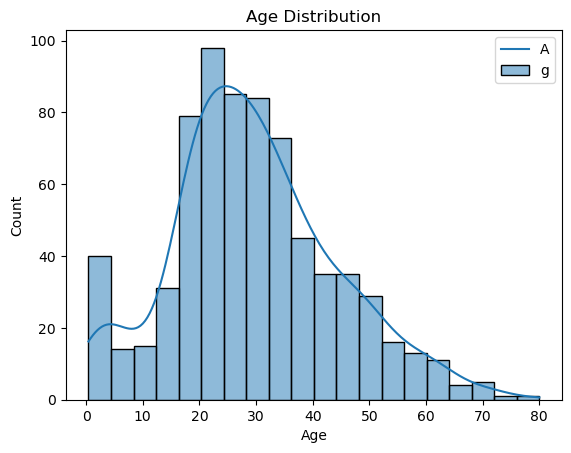

In [13]:
# Age columns has also missing values %19 proportions. We can use the distribution graph what we should value for missing data.

fig = plt.figure()
ax = sns.histplot(data = df_train_data, x='Age', kde=True)
ax.set_title("Age Distribution")
ax.legend("Age")
fig.add_subplot(ax);

We decided to use mean fill missing value

In [14]:
df_concat_data["Age"] = df_concat_data["Age"].fillna(df_train_data["Age"].mean())
df_concat_data["Age"].isna().any()

False

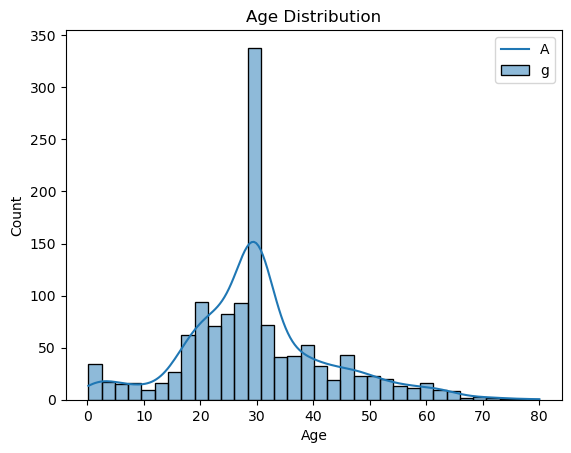

In [15]:
fig = plt.figure()
ax = sns.histplot(data = df_concat_data, x="Age", kde=True)
ax.set_title("Age Distribution")
ax.legend("Age")
fig.add_subplot(ax);

Embarked column has missing value %0.22. We will use to most used value 

In [16]:
df_concat_data["Embarked"] = df_concat_data["Embarked"].fillna(df_train_data["Embarked"].mode().to_string())
df_concat_data["Embarked"].isna().any()

False

In [17]:
df_concat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Embarked     1309 non-null   object 
 2   Fare         1308 non-null   float64
 3   Name         1309 non-null   object 
 4   Parch        1309 non-null   int64  
 5   PassengerId  1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Sex          1309 non-null   object 
 8   SibSp        1309 non-null   int64  
 9   Survived     891 non-null    float64
 10  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [18]:
df_concat_data["Embarked"].unique()

array(['S', 'C', 'Q', '0    S'], dtype=object)

In [19]:
df_concat_data["Embarked"].isnull().any()

False

In [20]:
df_concat_data["Embarked"].value_counts()

S         914
C         270
Q         123
0    S      2
Name: Embarked, dtype: int64

In [21]:
df_train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df_concat_data.isnull().sum()

Age              0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [23]:
df_concat_data["Fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

In [24]:
df_concat_data["Fare"] = df_concat_data["Fare"].fillna(df_train_data["Fare"].mean())

In [25]:
count_null(df_concat_data)

,Null Count,Proportion
Age,0,0.0%
Embarked,0,0.0%
Fare,0,0.0%
Name,0,0.0%
Parch,0,0.0%
PassengerId,0,0.0%
Pclass,0,0.0%
Sex,0,0.0%
SibSp,0,0.0%
Survived,418,31.9328%


### 3.2 Convert to Numeric Datas

In [26]:
df_concat_data.loc[(df_concat_data["Embarked"]!="S") & (df_concat_data["Embarked"]!="C") & (df_concat_data["Embarked"]!="Q"), "Embarked"] = df_train_data["Embarked"].mode()[0]

In [27]:
df_concat_data["Embarked"].isnull().sum()

0

In [28]:
# Embarked transforming numeric
df_concat_data["Embarked"] = df_concat_data["Embarked"].map({"S":1, "C":2, "Q":3})
df_concat_data["Embarked"]

0       1
1       2
2       1
3       1
4       1
       ..
1304    1
1305    2
1306    1
1307    1
1308    2
Name: Embarked, Length: 1309, dtype: int64

Sex Column convert to numeric
* Female -- 0
* Male -- 1

In [29]:
df_concat_data["Sex"] = df_concat_data["Sex"].map({"female":0, "male":1})
df_concat_data["Sex"]

0       1
1       0
2       0
3       0
4       1
       ..
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

**Accompanied Column** 

Accompanied column is created based on Ticket column. Passengers with the same ticket number are counted as accompanied, otherwise they are unaccompanied. The accompanied, and unaccompanied in the Accompanied column is converted to a numeric representation as follows:

* accompanied --> 1
* unaccompanied --> 0

In [30]:
df_concat_data["Accompanied"] = df_concat_data["Ticket"].duplicated(keep=False).astype(int)

In [31]:
df_concat_data["Accompanied"].value_counts()

0    713
1    596
Name: Accompanied, dtype: int64

**Title Column** 

Title column is created based on Name column.

In [32]:
df_concat_data["Title"] = df_concat_data["Name"].str.extract('([A-Za-z]+)\.', expand=False)
df_concat_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [33]:
df_concat_data["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

As shown the above table, there are 18 titles in totle, which the top four titles are Mr., Miss., Mrs., Master. And the rest of titles are less than 10. So the Title column is converted to a numeric representation as follows:

* Mr --> 1
* Miss --> 2
* Mrs --> 3
* Master --> 4
* Others --> 5

In [34]:
df_concat_data["Title"] = df_concat_data["Title"].replace(["Rev", "Dr", "Col", "Mlle", "Major", "Ms", "Lady", "Sir", "Mme", "Don", "Capt", "Countess", "Jonkheer", "Dona"], "Others")
df_concat_data["Title"] = df_concat_data["Title"].map({"Mr": 1, "Miss": 2, "Mrs":3, "Master":4, "Others":5})

In [35]:
df_concat_data["Title"].value_counts()

1    757
2    260
3    197
4     61
5     34
Name: Title, dtype: int64

In [36]:
df_concat_data["Fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
26.2833     1
14.0000     1
15.0000     1
6.2375      1
7.7208      1
Name: Fare, Length: 282, dtype: int64

**AgePeriod Column**

AgePeriod column is created based on Age column.

The age of the passengers could be divided into several periods as follows:

* Infancy Period: up to 1 year -- 1
* Childhood Period: 1 - 13 years -- 2
* Period of Youth: 13 - 25 years -- 3
* Maturity Period: 25 - 61 years -- 4
* Presenile Period: 61 - 73 years -- 5
* Senile Period: 73 - 85 years -- 6
* The Elderly Period: over 85 years -- 7

In [37]:
df_concat_data.loc[(df_concat_data['Age'] > 0)&(df_concat_data['Age'] <= 1), 'AgePeriod'] = 1
df_concat_data.loc[(df_concat_data['Age'] > 1)&(df_concat_data['Age'] <= 13), 'AgePeriod'] = 2
df_concat_data.loc[(df_concat_data['Age'] > 13)&(df_concat_data['Age'] <= 25), 'AgePeriod'] = 3
df_concat_data.loc[(df_concat_data['Age'] > 25)&(df_concat_data['Age'] <= 61), 'AgePeriod'] = 4
df_concat_data.loc[(df_concat_data['Age'] > 61)&(df_concat_data['Age'] <= 73), 'AgePeriod'] = 5
df_concat_data.loc[(df_concat_data['Age'] > 73)&(df_concat_data['Age'] <= 85), 'AgePeriod'] = 6
df_concat_data.loc[(df_concat_data['Age'] > 85), "AgePeriod"] = 7
df_concat_data["AgePeriod"] = df_concat_data["AgePeriod"].astype(int)
df_concat_data["AgePeriod"].head()

0    3
1    4
2    4
3    4
4    4
Name: AgePeriod, dtype: int32

**FareBin Column**

FareBin column is created based on Fare column. It divides the fares into 4 bins of equal length, which are represented by 1, 2, 3, and 4.

In [38]:
df_concat_data["FareBin"] = pd.qcut(df_concat_data["Fare"], q=4, labels=[1, 2, 3, 4]).astype(int)

In [39]:
df_concat_data["FareBin"]

0       1
1       4
2       2
3       4
4       2
       ..
1304    2
1305    4
1306    1
1307    2
1308    3
Name: FareBin, Length: 1309, dtype: int32

### 3.4 Data Visualizations

In [40]:
df_train_data = df_concat_data.iloc[:891]
df_test_data = df_concat_data.iloc[891:]

In [41]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    int64  
 2   Fare         891 non-null    float64
 3   Name         891 non-null    object 
 4   Parch        891 non-null    int64  
 5   PassengerId  891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Sex          891 non-null    int64  
 8   SibSp        891 non-null    int64  
 9   Survived     891 non-null    float64
 10  Ticket       891 non-null    object 
 11  Accompanied  891 non-null    int32  
 12  Title        891 non-null    int64  
 13  AgePeriod    891 non-null    int32  
 14  FareBin      891 non-null    int32  
dtypes: float64(3), int32(3), int64(7), object(2)
memory usage: 94.1+ KB


<AxesSubplot:title={'center':'Accompanied-Survived Distribution'}, xlabel='Accompanied', ylabel='Passenger Count'>

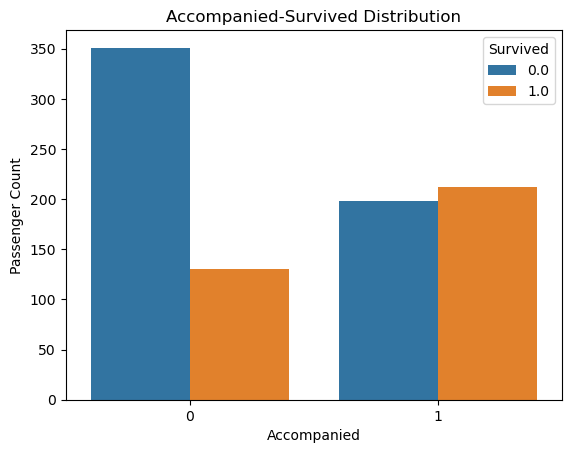

In [43]:
fig = plt.figure()
ax = sns.countplot(data=df_train_data, x='Accompanied',hue='Survived')
ax.set_title('Accompanied-Survived Distribution')
ax.set_xlabel('Accompanied')
ax.set_ylabel('Passenger Count')
fig.add_subplot(ax)


In [44]:
pd.crosstab(df_train_data.Accompanied, df_train_data.Survived)

Survived,0.0,1.0
Accompanied,,
0,351,130
1,198,212


In [46]:
pd.crosstab(df_train_data.Embarked, df_train_data.Survived)

Survived,0.0,1.0
Embarked,,
1,427,219
2,75,93
3,47,30


<AxesSubplot:title={'center':'Accompanied-Survived Distribution'}, xlabel='Accompanied', ylabel='Passenger Count'>

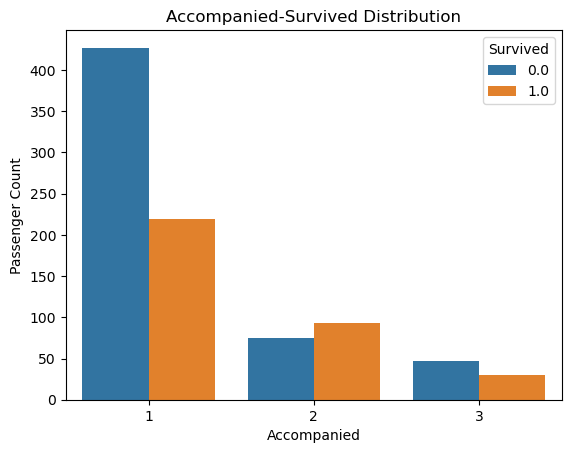

In [48]:
fig = plt.figure()
ax = sns.countplot(data=df_train_data, x='Embarked',hue='Survived')
ax.set_title('Accompanied-Survived Distribution')
ax.set_xlabel('Accompanied')
ax.set_ylabel('Passenger Count')
fig.add_subplot(ax)


In [49]:
pd.crosstab(df_train_data.Sex, df_train_data.Survived)

Survived,0.0,1.0
Sex,,
0,81,233
1,468,109


<AxesSubplot:title={'center':'Accompanied-Survived Distribution'}, xlabel='Accompanied', ylabel='Passenger Count'>

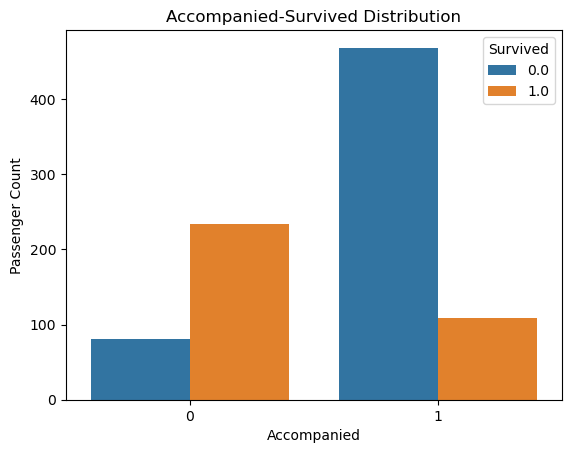

In [50]:
fig = plt.figure()
ax = sns.countplot(data=df_train_data, x='Sex',hue='Survived')
ax.set_title('Accompanied-Survived Distribution')
ax.set_xlabel('Accompanied')
ax.set_ylabel('Passenger Count')
fig.add_subplot(ax)


In [51]:
pd.crosstab(df_train_data.AgePeriod, df_train_data.Survived)

Survived,0.0,1.0
AgePeriod,,
1,2,12
2,27,30
3,148,82
4,358,213
5,13,4
6,1,1


<AxesSubplot:title={'center':'Accompanied-Survived Distribution'}, xlabel='Accompanied', ylabel='Passenger Count'>

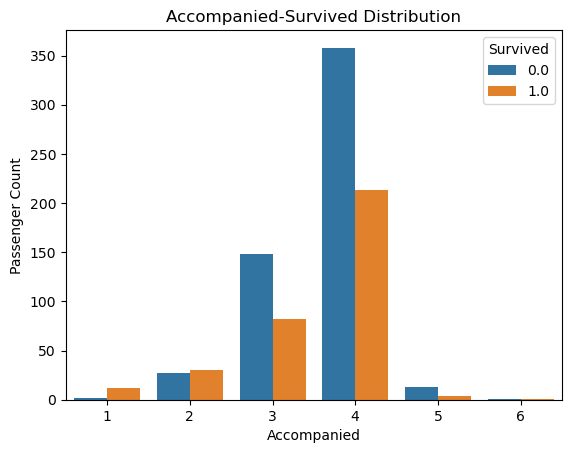

In [52]:
fig = plt.figure()
ax = sns.countplot(data=df_train_data, x='AgePeriod',hue='Survived')
ax.set_title('Accompanied-Survived Distribution')
ax.set_xlabel('Accompanied')
ax.set_ylabel('Passenger Count')
fig.add_subplot(ax)


In [53]:
pd.crosstab(df_train_data.Pclass, df_train_data.Survived)

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:title={'center':'Accompanied-Survived Distribution'}, xlabel='Accompanied', ylabel='Passenger Count'>

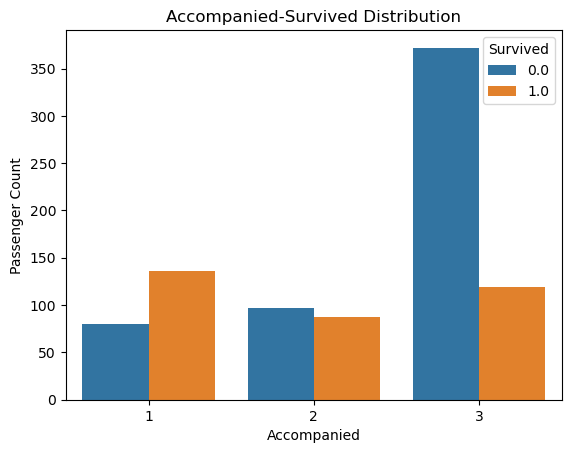

In [54]:
fig = plt.figure()
ax = sns.countplot(data=df_train_data, x='Pclass',hue='Survived')
ax.set_title('Accompanied-Survived Distribution')
ax.set_xlabel('Accompanied')
ax.set_ylabel('Passenger Count')
fig.add_subplot(ax)


# 4. Modeling and Prediction

The purpose of this project is to identify the relationship between the passenger survived and other variables. It is a classification supervised learning problem. Therefore, the following prediction model can be used to make predictions:

* Logistic Regression
* KNN(K-Nearest Neighbors)
* Support Vector Machines
* Naive Bayes Classifier
* Decision Tree
* Random Forrest
* Perceptron

#### 4.1 Import Libraries

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

#### 4.1 Feature Selection

C:\Users\Dell\AppData\Local\Temp\ipykernel_1416\582738397.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


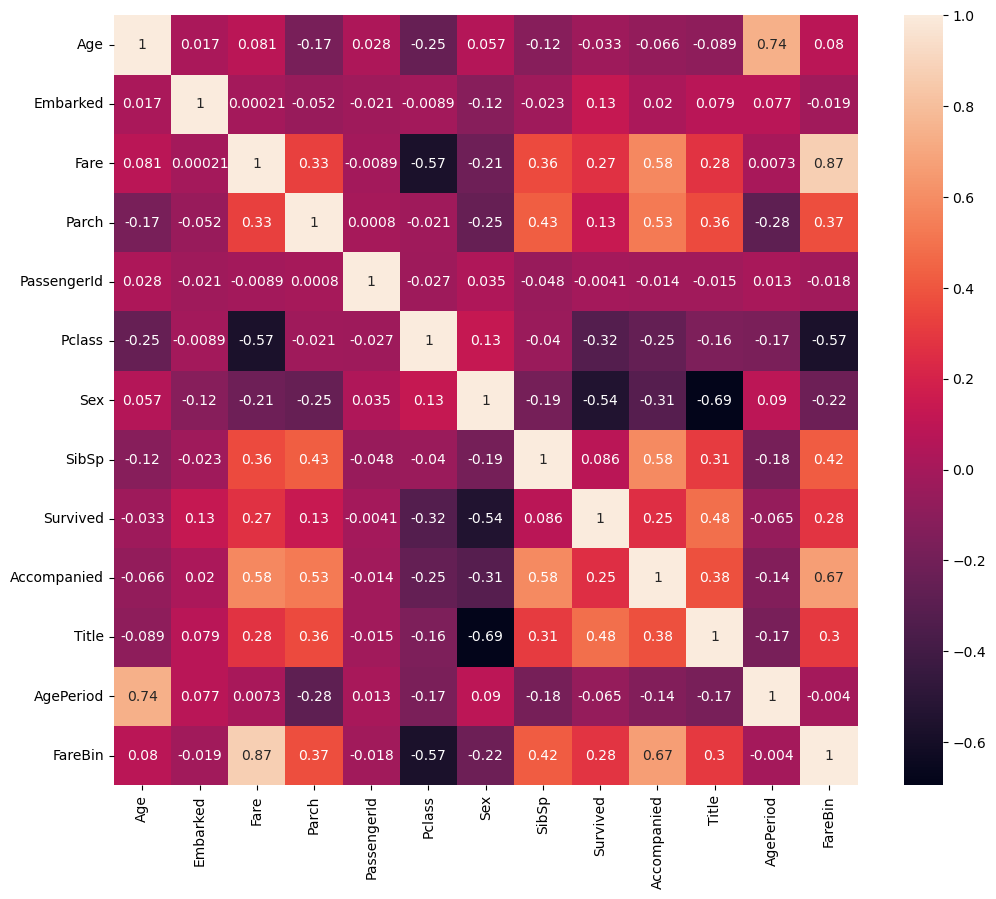

In [61]:
correlation = df_train_data.corr(method='kendall')
fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(correlation, annot=True)
fig.add_subplot(ax)
fig.show()

**As show in figure above:**

The newly created columns are more correlated with Survived than their base columns.
`Accompanied`, `Age Period`, `FareBin`, `Title`

In [64]:
# Drop the unnecessary column
dropped_column = ["Age", "Fare", "Name", "Ticket", "Parch", "SibSp"]
for i in dropped_column:
    df_concat_data = df_concat_data.drop([i], axis=1)

In [67]:
df_concat_data.columns

Index(['Embarked', 'PassengerId', 'Pclass', 'Sex', 'Survived', 'Accompanied',
       'Title', 'AgePeriod', 'FareBin'],
      dtype='object')

Selected the features which effects our model 

In [68]:
df_train_data = df_concat_data.iloc[:891]
df_test_data = df_concat_data.iloc[891:]
x = df_train_data.drop(["Survived", "PassengerId"], axis=1)
y = df_train_data["Survived"]

In [70]:
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [71]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((712, 7), (179, 7), (712,), (179,))

In [76]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_val)
acc_score = lr.score(x_val, y_val) * 100
print(acc_score)

78.2122905027933


In [75]:
# K neighbors Classifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
predictions = knc.predict(x_val)
acc_score = knc.score(x_val, y_val) * 100
print(acc_score)


82.68156424581005


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

In [121]:
# Put models in a dictionary
models = { "Logistic Regression": LogisticRegression(),
           "KNN": KNeighborsClassifier(),
           "Random Forest": RandomForestClassifier(), 
           "Linear SVC": LinearSVC(),
           "Gaussian NB": GaussianNB(),
           "Decision Tree": DecisionTreeClassifier(),
           "Perceptron": Perceptron()
          }

# Create a function to fit and score models

def fit_and_score(model, x_train, x_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    x_train: training data (no labels)
    x_test: val data (no labels)
    y_train: training labels
    y_test: val labels
    """
    # Set Random Seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_val, y_val) * 100
    return model_scores

In [122]:
model_scores = fit_and_score(model=models, 
                             x_train=x_train,
                             x_val=x_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 78.2122905027933,
 'KNN': 82.68156424581005,
 'Random Forest': 82.68156424581005,
 'Linear SVC': 78.2122905027933,
 'Gaussian NB': 77.09497206703911,
 'Decision Tree': 80.44692737430168,
 'Perceptron': 72.62569832402235}

<AxesSubplot:>

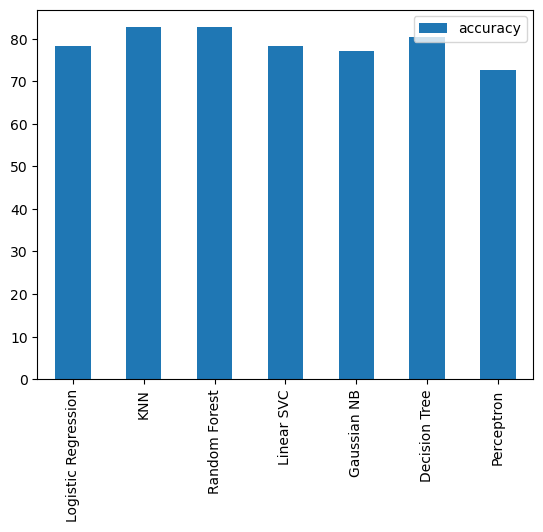

In [100]:
# Model comparison
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

We reached the best score by the Random Forest Classifier.
Now, we evaluate the this model hyperparameters

### 4.2 Hyperparameter Tuning with GridSearchCV

* n_estimators
* max_features
* max_depth
* min_samples_split
* min_samples_leaf
* bootstrap
* max_samples

In [147]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
np.random.seed(42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ["auto"],
    'min_samples_leaf': [1,3],
    'min_samples_split': [2, 12],
    'n_estimators': [100,200, 1000],
    'max_samples':[None]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = None, n_jobs = None)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['auto'], 'max_samples': [None],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 12],
                         'n_estimators': [100, 200, 1000]})

In [149]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [148]:
grid_search.score(x_val, y_val)

0.7932960893854749

In [144]:
model_2 = RandomForestClassifier()
model_2.fit(x_train, y_train)

RandomForestClassifier()

In [145]:
model_2.score(x_val, y_val)

0.8100558659217877

**NOTE:** We can see the highest score when the setting model default hyperparameters. 
we will use the model without any tuning.


### 4.4 Prediction

In [155]:
passenger_id = df_test_data['PassengerId']
predictions = model_2.predict(df_test_data.drop(['Survived', 'PassengerId'], axis=1)).astype(int)
submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions})
submission.to_excel('submission_2.xlsx', index=False)
print("Submission was saved successfully")

Submission was saved successfully


In [156]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [165]:
df_train_data.head().T

,0,1,2,3,4
Embarked,1.0,2.0,1.0,1.0,1.0
PassengerId,1.0,2.0,3.0,4.0,5.0
Pclass,3.0,1.0,3.0,1.0,3.0
Sex,1.0,0.0,0.0,0.0,1.0
Survived,0.0,1.0,1.0,1.0,0.0
Accompanied,0.0,1.0,0.0,1.0,0.0
Title,1.0,3.0,2.0,3.0,1.0
AgePeriod,3.0,4.0,4.0,4.0,4.0
FareBin,1.0,4.0,2.0,4.0,2.0


In [167]:
df_train_data.to_excel('train_changed.xlsx', index=False)